In [2]:
#importing required libraries, reading and describing csv
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv("/content/Mumbai.csv")
print(df.describe())
df.fillna(method='ffill', inplace=True)
df.tmax.fillna(method='bfill', inplace=True)

               tavg         tmin         tmax         prcp
count  11883.000000  9440.000000  9987.000000  7213.000000
mean      27.762509    22.618549    32.315040    10.942007
std        2.189138     3.803629     2.234577    29.808576
min       17.700000     8.500000    22.300000     0.000000
25%       26.600000    19.800000    30.900000     0.000000
50%       28.100000    23.700000    32.400000     0.000000
75%       29.300000    25.400000    33.900000     7.100000
max       33.700000    30.400000    41.300000   461.000000


In [3]:
#Plotting the maximum temperatures
figure = px.line(df, x="time",
                 y="tmax",
                 title='Maximum Temperatures in Mumbai')
figure.show()

In [4]:
#Plotting the minimum temperatures
figure = px.line(df, x="time",
                 y="tmin",
                 title='Minimum Temperatures in Mumbai')
figure.show()

In [5]:
#Plotting the Average temperatures
figure = px.line(df, x="time",
                 y="tavg",
                 title='Mean Temperature in Mumbai')
figure.show()

In [6]:
#dropping unwanted columns and preparing data frame for prophet modelling
df=df.drop(['tmax'],axis=1)
df=df.drop(['tmin'],axis=1)
df=df.drop(["prcp"],axis=1)
df.rename(columns = {'time':'ds','tavg':'y'}, inplace = True)
print(df.to_string())

               ds     y
0      01-01-1990  23.2
1      02-01-1990  22.2
2      03-01-1990  21.8
3      04-01-1990  25.4
4      05-01-1990  26.5
5      06-01-1990  25.1
6      07-01-1990  26.0
7      08-01-1990  26.6
8      09-01-1990  25.1
9      10-01-1990  26.8
10     11-01-1990  25.6
11     12-01-1990  24.3
12     13-01-1990  22.4
13     14-01-1990  25.4
14     15-01-1990  23.7
15     16-01-1990  24.0
16     17-01-1990  24.8
17     18-01-1990  23.8
18     19-01-1990  25.5
19     20-01-1990  25.2
20     21-01-1990  25.4
21     22-01-1990  25.8
22     23-01-1990  26.4
23     24-01-1990  26.1
24     25-01-1990  25.5
25     26-01-1990  25.9
26     27-01-1990  25.2
27     28-01-1990  24.1
28     29-01-1990  23.8
29     30-01-1990  24.2
30     31-01-1990  24.3
31     01-02-1990  24.2
32     02-02-1990  23.2
33     03-02-1990  24.8
34     04-02-1990  23.8
35     05-02-1990  24.0
36     06-02-1990  26.0
37     07-02-1990  27.1
38     08-02-1990  27.0
39     09-02-1990  26.5
40     10-02-199

In [7]:
#Extraction of year and month
df["ds"] = pd.to_datetime(df["ds"], format = '%d-%m-%Y')
df['year'] = df['ds'].dt.year
df["month"] = df["ds"].dt.month

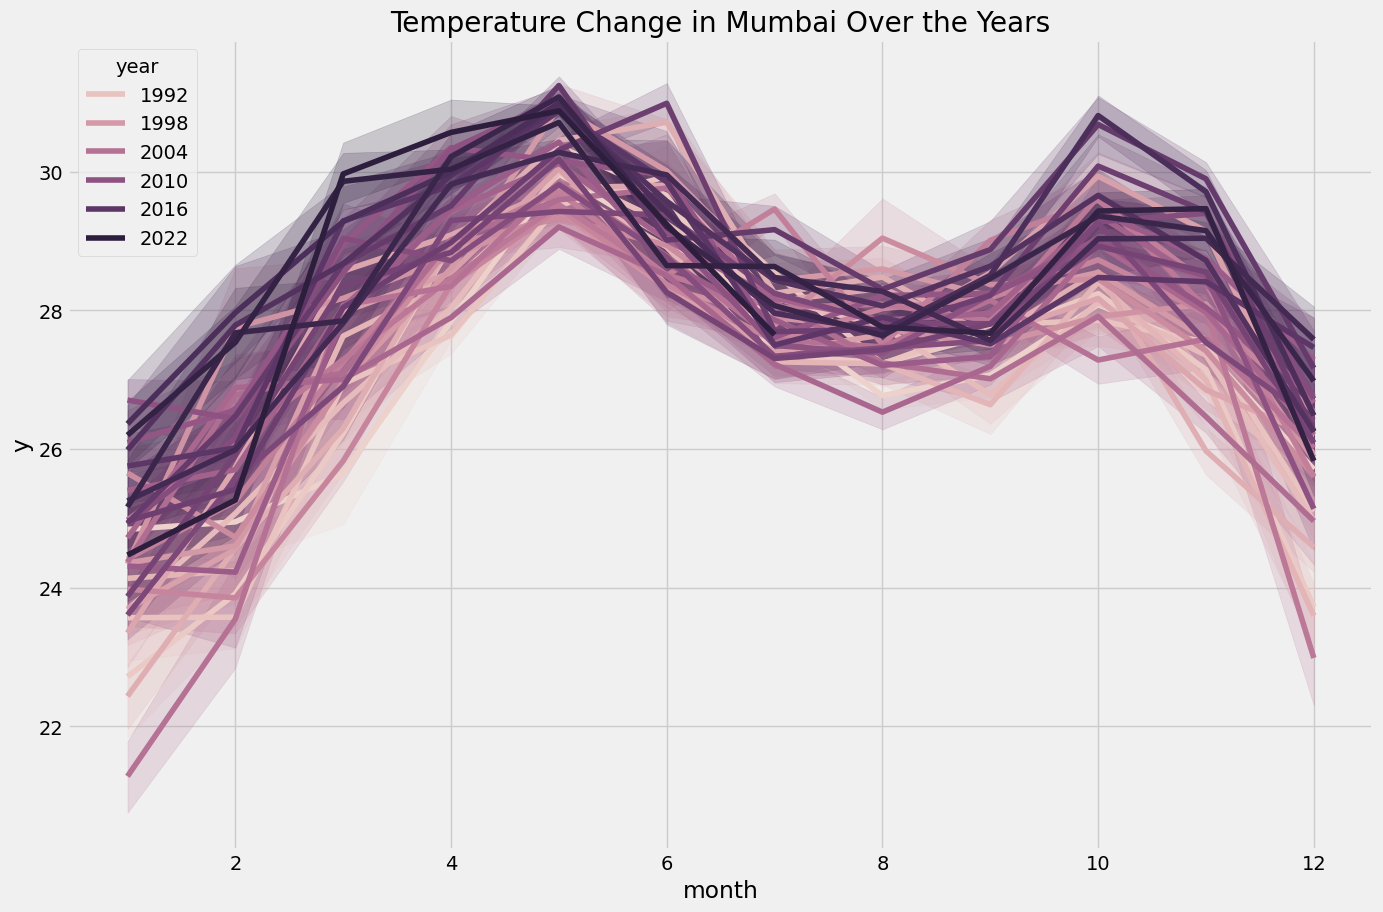

In [8]:
#Plotting temperature over the years
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Mumbai Over the Years")
sns.lineplot(data = df, x='month', y='y', hue='year')
plt.show()

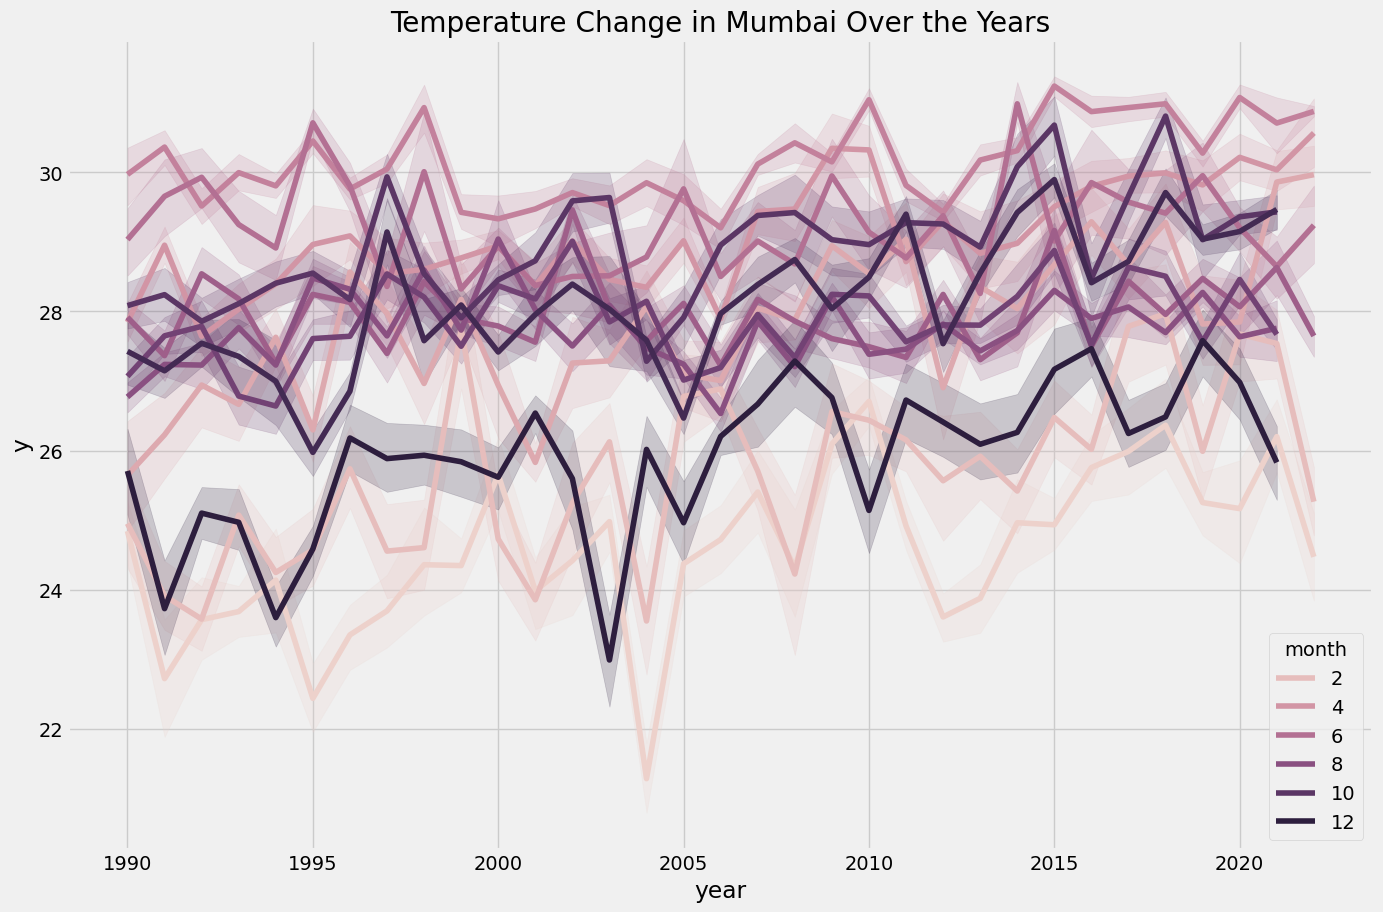

In [9]:
#plotting temperatures over the months
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Mumbai Over the Years")
sns.lineplot(data = df, x='year', y='y', hue='month')
plt.show()

In [10]:
#Creating a predictive model using prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(df)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/cx9lhiig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/c2krdao3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15958', 'data', 'file=/tmp/tmpg1ca0g3t/cx9lhiig.json', 'init=/tmp/tmpg1ca0g3t/c2krdao3.json', 'output', 'file=/tmp/tmpg1ca0g3t/prophet_modelq9gdf8bu/prophet_model-20240401112906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


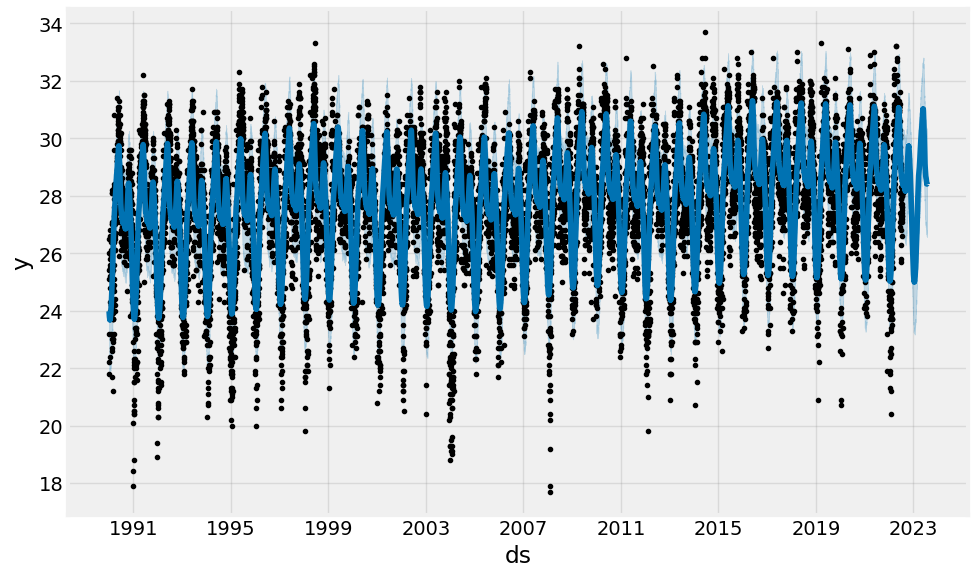

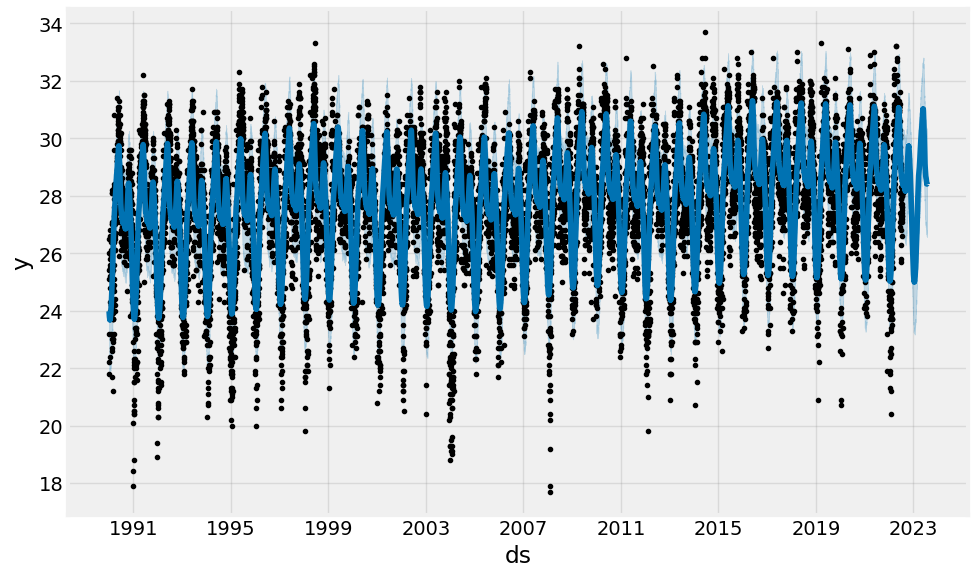

In [11]:
model.plot(predictions)

In [12]:
#cross validation of model
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 60 forecasts with cutoffs between 1992-06-27 00:00:00 and 2021-07-25 00:00:00


  0%|          | 0/60 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/np98e98i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/0lntclfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94254', 'data', 'file=/tmp/tmpg1ca0g3t/np98e98i.json', 'init=/tmp/tmpg1ca0g3t/0lntclfh.json', 'output', 'file=/tmp/tmpg1ca0g3t/prophet_model7a_71lr_/prophet_model-20240401112917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/26aiisq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/7nca0ubm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [13]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape     smape  \
0 37 days  2.013161  1.418859  1.092962  0.039390  0.030344  0.039334   
1 38 days  1.987041  1.409624  1.089292  0.039236  0.030394  0.039205   
2 39 days  1.972198  1.404350  1.087818  0.039170  0.030171  0.039162   
3 40 days  1.983351  1.408315  1.092796  0.039387  0.030906  0.039378   
4 41 days  1.991722  1.411284  1.096333  0.039552  0.030966  0.039529   

   coverage  
0  0.781963  
1  0.782420  
2  0.781963  
3  0.780365  
4  0.779680

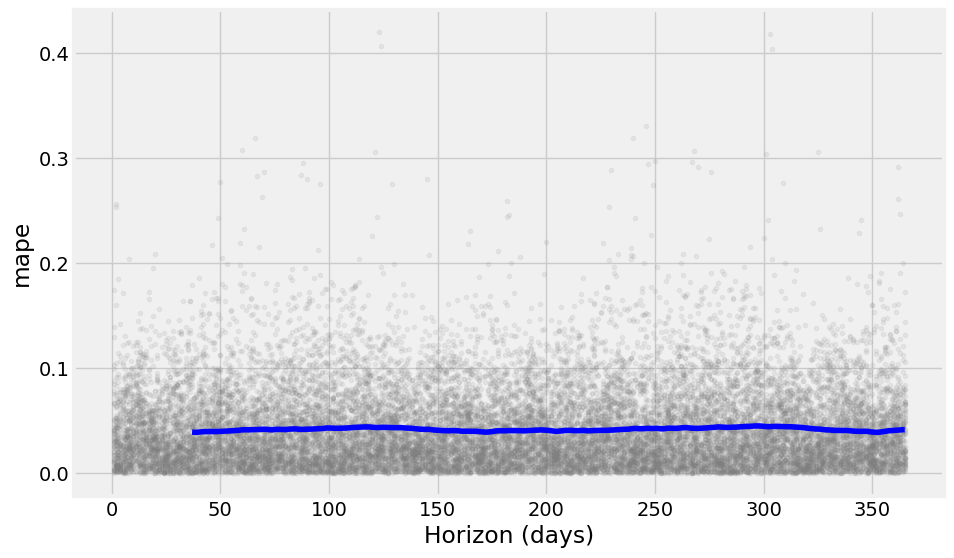

In [14]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/z5lbvku3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/_d46uolg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28399', 'data', 'file=/tmp/tmpg1ca0g3t/z5lbvku3.json', 'init=/tmp/tmpg1ca0g3t/_d46uolg.json', 'output', 'file=/tmp/tmpg1ca0g3t/prophet_modeljn_pr27l/prophet_model-20240401113131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/tdayev2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg1ca0g3t/d4bv8cs6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/